# Lab. 5: Iterated local Search and Simulated Annealing

## Introduction

#### <u>The goal of this lab is to compare the behavior of Iterated Local search (ILS) and Simulated Annealing on the knapsack 0/1 problem</u>

You'll have to implement five methods:

- *Iterated Local Search*:
  - perturbation(x, k). Try different implementation of the perturbation methods. (similar to the shake method in the previous lab)
  - local_search(f, x). Try different local search strategies (FirstImprovement or BestImprovement)
- *Simulated Annealing*:
  - random_neighbor(x, i). Select a random neighbor for the solution x by doing only a few changes
  - acceptance(x, eval_x, xp, eval_xp, T). Return the accepted solution (x or xp) and corresponding fitness.
  - update_temperature(T, alpha). Proceed with the update of the temperature parameter.
---

Getting started: The following cells contain the implementation of the methods that we will use throughout this lab, together with utilities.

#### **The Knapsack 0/1 problem** is a combinatorial problem that works as follows.

We have a bag with limited capacity L, and we have a set of items  $I=\{i_1,...,i_N\}$  Each  $i_j$  has a given volume $w_{ij}$ and a value $v_{ij}$. The goal of the optimization problem is to fill the bag with a combination of items $S$ such that the combination maximizes the total value contained by the bag while complaining with the constraint on the capacity.

In this version of the knapsack problem we can either discard or carry (at most 1) item. Thus, the search space is $\{0,1\}^{|I|}$ .

Since this is a maximization problem, we can turn it into a minimization problem by returning the opposite of the value. If a solution is not feasible (i.e., exceeds the maximum volume) the function will return a score of 0 (like an empty bag).


Assume
$$ N = \text{number of items} $$
$$ X = \{x_1, x_2, \dots, x_N\} = \text{set of items} $$
$$ v_i = \text{value of item } x_i $$
$$ w_i = \text{weight of item } x_i $$
$$ W = \text{maximum weight the knapsack can hold} $$


Then the 0/1 knapsack problem can be formulated as follows:

\begin{equation*}
  \begin{array}{lr@{}c@{}r@{}l}
    \text{maximize }   &S = \sum_{x_i \in X} v_i x_i \\
    \text{subject to } & \sum_{x_i \in X} w_i x_i \leq W \\
                       & x_i \in \{0, 1\} \forall x_i \in X \\
  \end{array}
\end{equation*}

\\

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Knapsack_0_1:

    def __init__(self):
        self._items = [
            {'name': 'apple', 'value': 1, 'volume': 2},
            {'name': 'pear', 'value': 2, 'volume': 2},
            {'name': 'banana', 'value': 2, 'volume': 2},
            {'name': 'watermelon', 'value': 5, 'volume': 10},
            {'name': 'orange', 'value': 3, 'volume': 2},
            {'name': 'avocado', 'value': 3, 'volume': 2},
            {'name': 'blueberry', 'value': 3, 'volume': 1},
            {'name': 'coconut', 'value': 4, 'volume': 3},
            {'name': 'cherry', 'value': 2, 'volume': 1},
            {'name': 'apricot', 'value': 1, 'volume': 1}, 
        ]
        self._BAG_CAPACITY = 10
        self.history = []
        self.values = []

    def _get_value(self, solution):
        cur_cap = self._BAG_CAPACITY
        cur_val = 0
        for i, v in enumerate(solution):
            if v == 1:
                cur_val += self._items[i]['value']
                cur_cap -= self._items[i]['volume']
            if cur_cap < 0:
                return 0
        return -cur_val

    def __call__(self, solution):
        value = self._get_value(solution)
        self.history.append(solution)
        self.values.append(value)
        return value

    def trend(self):
        plt.figure()
        plt.plot(self.values)
        plt.show()

## Exercises

### Iterated Local Search
**Finish the implementation of the algorithm first**, then answer the question later on.

In [10]:
import copy
import random

def iteratedLocalSearch(f, x0, ls_max):
    """
    Seeks for the minimum of the function by means of the Iterated local search algorithm.

    - f: the function to optimize
    - x0: the initial point
    - ls_max: the max number of local search
    """

    def perturbation(x, k):
        """
        Implements the perturbation step for the ILS algorithm.

        - x: starting point
        - k: number of changes to be made

        Returns:
        - x': the random sampled from the neighborhood
        """
        xp = copy.deepcopy(x)
        for i in range(k):
            index = random.randint(0, len(x) - 1)
            if xp[index] == 0:
                xp[index] = 1
            else:
                xp[index] = 0
        # To be implemented

    #assert False, "Perturbation step has to be implemented"
        return xp

    def acceptance_criterion(f, x, xs, k):
        if f(xs) < f(x):
            x = xs
            k = 1
        else:
            k += 1
        return x, k

    def local_search(f, x, method):
        """
        Implements the local search step (e.g.: BestImprovement) for the ILS algorithm.

        - f: function to optimize
        - x: starting point

        Returns:
        - x': local optimum
        """
        # To be implemented
        #assert False, "Local Search step has to be implemented"

        xp = copy.deepcopy(x)
        if method == 'BestImprovment':
            for i in range(len(xp)):
                if xp[i] == 1:
                    xp[i] = 0
                else:
                    xp[i] = 1
                if f(xp) > f(x):
                    x = xp
        elif method == 'FirstImprovment':
            for i in range(len(xp)):
                if xp[i] == 1:
                    xp[i] = 0
                else:
                    xp[i] = 1
                if f(xp) > f(x):
                    x = xp
                    break
        return xp

    n = 0
    x = np.array(x0, int)
    best = x
    bestval = f(x)

    i = 0
    while i < ls_max:
        xp = perturbation(x, i)
        xs = local_search(f, xp, method='BestImprovment')
        x, i = acceptance_criterion(f, x, xs, i)

        # Store the best
        curval = f(x)
        if curval < bestval:
            bestval = curval
            best = x
    return best

#### Questions:
- how does the starting point influence the search process?

By restarting from perturbed versions of solutions, ILS can explore the solution space in a manner that is less dependent on the initial conditions, especially when the number of iterations is large So the starting point becomes less critical over time.
The use of random perturbations and the iterative nature of the search allow the algorithm to explore broadly and deeply, thus diminishing the significance of where the search originally began, especially in cases where a large number of iterations are involved. This makes ILS particularly robust to variations in the initial starting point.

- how does the ls_max parameter affect the quality of the result?

Increasing ls_max allows the algorithm more opportunities to explore different regions of the solution space. Each restart involves perturbing the solution and potentially moving to a different part of the solution landscape, which can help discover new local optima that might not have been reached in previous iterations. However, there's also a trade-off in terms of consistency. While more restarts can lead to better results, they can also introduce variability in the outcomes and is more expensive in term of computational cost.

- how does the perturbation of the solutions affect:
    - quality of the search?

    Effective perturbation helps balance exploration (searching new areas) and exploitation (refining existing solutions).  Perturbations increase the diversity of the solutions explored during the search, which is crucial in complex landscapes with multiple optima. This diversity helps in avoiding convergence to suboptimal solutions and improves the robustness of the search process.

    - velocity of the search?

     Small perturbations might lead to slower progress as the search might stay around the same area for longer periods. In contrast, larger, more significant perturbations might move the search to new regions more quickly, potentially speeding up the discovery of good solutions but also risking the bypass of optimal zones.




STARTING POINT = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 	 value = 0, 	 NUMBER OF ITERATIONS: 10 
SOLUZIONE FNALE = [1 1 0 0 0 0 1 1 1 0] 	 VALORE = -12


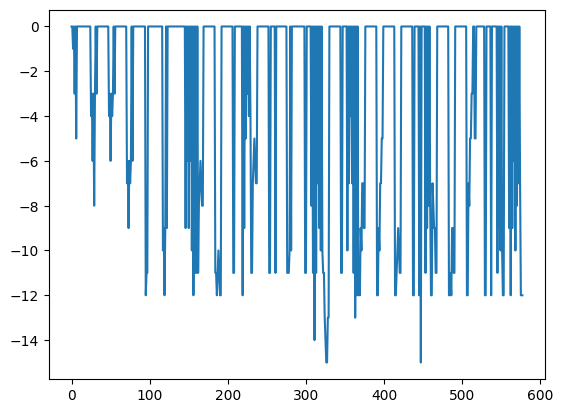



STARTING POINT = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 	 value = 0, 	 NUMBER OF ITERATIONS: 20 
SOLUZIONE FNALE = [0 1 1 0 0 1 1 1 0 0] 	 VALORE = -14


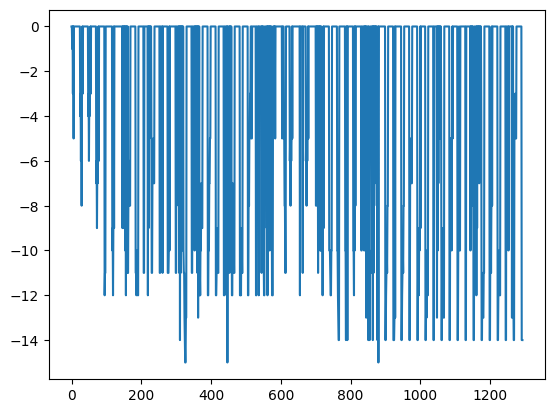



STARTING POINT = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 	 value = 0, 	 NUMBER OF ITERATIONS: 50 
SOLUZIONE FNALE = [0 0 1 0 1 1 1 1 0 0] 	 VALORE = -15


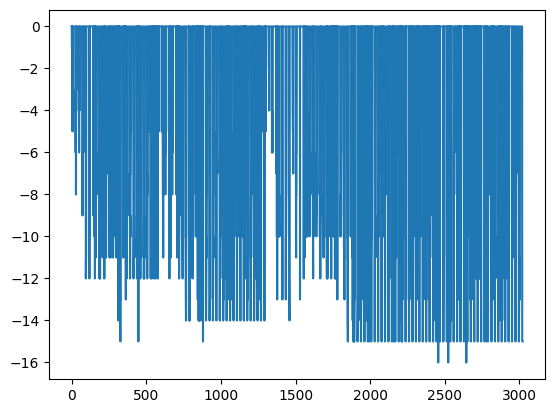



STARTING POINT = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 	 value = 0, 	 NUMBER OF ITERATIONS: 100 
SOLUZIONE FNALE = [0 1 1 0 0 0 1 1 1 1] 	 VALORE = -14


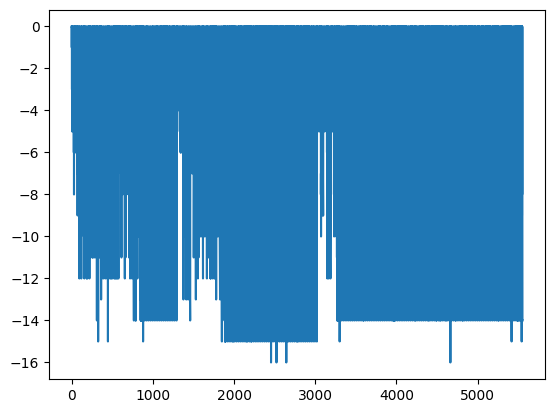



STARTING POINT = [1, 0, 1, 1, 0, 0, 0, 0, 1, 1] 	 value = 0, 	 NUMBER OF ITERATIONS: 10 
SOLUZIONE FNALE = [0 1 0 0 1 1 1 1 0 0] 	 VALORE = -15


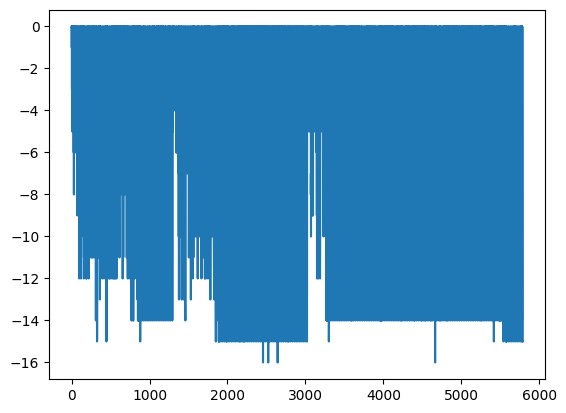



STARTING POINT = [1, 0, 1, 1, 0, 0, 0, 0, 1, 1] 	 value = 0, 	 NUMBER OF ITERATIONS: 20 
SOLUZIONE FNALE = [0 1 0 0 1 1 1 1 0 0] 	 VALORE = -15


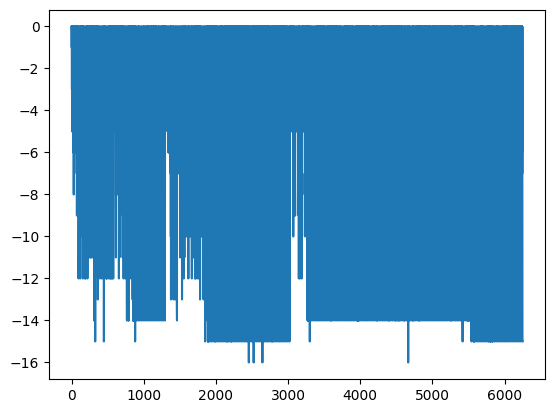



STARTING POINT = [1, 0, 1, 1, 0, 0, 0, 0, 1, 1] 	 value = 0, 	 NUMBER OF ITERATIONS: 50 
SOLUZIONE FNALE = [0 1 0 0 1 1 1 1 0 0] 	 VALORE = -15


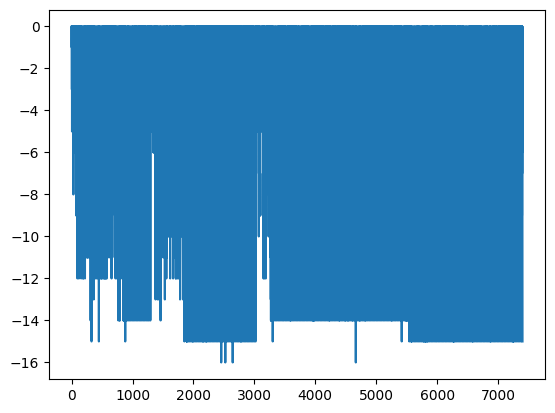



STARTING POINT = [1, 0, 1, 1, 0, 0, 0, 0, 1, 1] 	 value = 0, 	 NUMBER OF ITERATIONS: 100 
SOLUZIONE FNALE = [0 1 0 0 1 1 1 1 0 0] 	 VALORE = -15


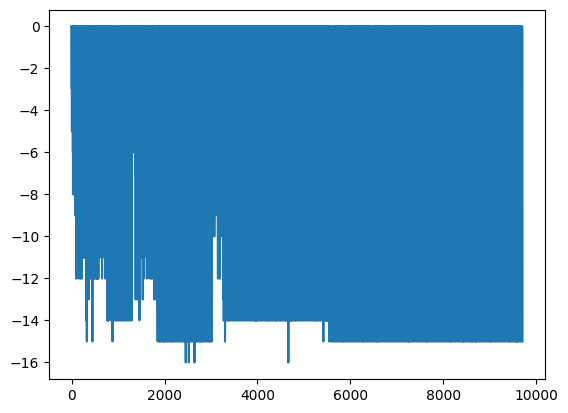

In [11]:
func = Knapsack_0_1()
change_start = True
start_list = [[0] * len(func._items), [random.randint(0, 1) for _ in range(len(func._items))] ]

for start in start_list:
    for ls_max in [10, 20, 50, 100]:
    
        print(f'\n\nSTARTING POINT = {start} \t value = {func(start)}, \t NUMBER OF ITERATIONS: {ls_max} ')
        x= iteratedLocalSearch(func, start, ls_max)
        print(f'SOLUZIONE FNALE = {x} \t VALORE = {func(x)}')
        func.trend()

### Simulated Annealing
**Finish the implementation of the algorithm first**, then answer the question later on.

In [12]:
import math 
def simulatedAnnealing(f, x0, iter, T, k, alpha):
    """
    Seeks for the minimum of the function by means of the Simulated Annealing algorithm.

    - f: the function to optimize
    - x0: the initial point
    - iter: number of temperature update
    - T: Initial high temperature
    - k: Number of iterations at fixed temperature
    - alpha: cooling scheduling parameter
    """

    def random_neighbor(x, i):
        """
        Generates a random neighbor for the solution x.

        - x: starting point
        - i: number of changes to be made

        Returns:
        - x': the random sampled from the neighborhood
        """
        # To be implemented
        #assert False, "Random Neighbor generator has to be implemented"
        xp = copy.deepcopy(x)
        for i in range(k):
            index = random.randint(0, len(x) - 1)
            if xp[index] == 0:
                xp[index] = 1
            else:
                xp[index] = 0
        return xp

    def acceptance(x, eval_x, xp, eval_xp, T):
        """
        Returns the solution and fitness accepted between x and xp.

        - x: current solution
        - eval_x: eval of solution x
        - xp: new solution
        - eval_xp: eval of solution xp
        - T: temperature

        Returns:
        - x: new current solution
        - eval_x: eval of new solution x
        """
        # To be implemented
        #assert False, "Acceptance function has to be implemented"
        if eval_xp < eval_x:
            x = xp
            eval_x = eval_xp
        else:
            soglia = math.exp(-(eval_xp - eval_x)/T)
            print(f'T = {T}\t eval_x = {eval_x}, \t eval_xp = {eval_xp}')
            
            prob = random.uniform(0, 1)
            print(f'soglia = {soglia} \t numero casuale = {prob}')
            if soglia > prob:
                x = xp
                eval_x = eval_xp
            else:
                pass
        return x, eval_x

    def update_temperature(T, alpha):
        """
        Updates the temperature T.

        - T: temperature
        - alpha: cooling scheduling parameter

        Returns:
        - T: updated temperature
        """
        # To be implemented
        T = alpha*T
        #assert False, "Temperature update function has to be implemented"
        return T

    x = np.array(x0)
    for i in range(iter):
        print(f'ITERAZIONE: {i} \t starting point: {x}')
        for fix_temp in range(k):
            eval_x = f(x)
            xp = random_neighbor(x, fix_temp)
            eval_xp = f(xp)
            print(f'random_neighbour = {xp} \t valore = {eval_xp}')
            x, eval_x = acceptance(x, eval_x, xp, eval_xp, T)
        T = update_temperature(T, alpha)

    return x, eval_x

#### Questions:
- how does the starting point influence the search process?


Since SA does not perform local search but is a purely stochastic algorithm, it is less sensitive to the initial point.
But obviously, a good starting point can potentially lead SA towards regions of the solution space that contain better-quality solutions, increasing the likelihood of finding a global optimum or a satisfactory solution and in the same time it may allow SA to converge more quickly to an optimal or near-optimal solution, as fewer iterations may be needed to improve upon the initial solution.


- how does the initial temperature affect the quality of the result?

The initial temperature affects the quality of the result by influencing the probability of accepting a solution worse than the current one. This probability increases with higher temperatures and decreases if the difference between the new solution and the current solution is large.
As the temperature is a decreasing function of time, it decreases with an increasing number of iterations. Therefore, starting with a higher temperature allows for a higher probability of accepting worse solutions, thus increasing the randomness of the algorithm. Conversely, starting the search with a lower temperature tends to resemble an iterative local search.


- how does the selection of the neighborhood affect:
    - quality of the search?   
    - velocity of the search?

About the quality of the search, a wider neighborhood allows for the selection of solutions that are further away from the current solution. This increases the exploration of the solution space and reduces the dependence on the starting point. Consequently, the search becomes more random and exploratory, potentially leading to the discovery of better solutions.
Conversely, a narrower neighborhood restricts the search to solutions closer to the current solution. While this may facilitate exploitation by focusing on improving the current solution, it can also limit exploration, making it harder to escape local optima unless the initial temperature is high enough to enable exploration.
While, a smaller neighborhood typically leads to a faster search because it involves sampling fewer points or solutions.
 
- How does the acceptance policy influence the search?

If the threshold of the acceptance policy is set too low, meaning that weaker solutions are accepted with a higher probability, the search process can resemble a random walk. In this scenario, the algorithm explores more the solution space, often accepting solutions that may not lead to significant improvements.
Conversely, if the acceptance policy is too high it rejects most candidate solutions, in these case the algorithm relies heavily on the generation of new solutions. In our case we generate solutions randomly but the algorithm can be improved using the history of past solutions to inform the generation of new ones.


- How does the update of the temparture affect the search?

The fact of starting with a high temperature that always decreases allows us to explore the space of possible solutions better at the beginning and gradually converge to an optimal solution. It's a great trade-off between exploration and exploitation.



STARTING POINT = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 	 value = 0 
ITERAZIONE: 0 	 starting point: [0 0 0 0 0 0 0 0 0 0]
random_neighbour = [0 0 0 0 0 1 0 0 1 0] 	 valore = -5
random_neighbour = [0 0 0 1 0 1 0 0 1 1] 	 valore = 0
T = 3	 eval_x = -5, 	 eval_xp = 0
soglia = 0.18887560283756183 	 numero casuale = 0.24958512716425896
ITERAZIONE: 1 	 starting point: [0 0 0 0 0 1 0 0 1 0]
random_neighbour = [0 0 1 0 0 0 0 0 1 0] 	 valore = -4
T = 1.5	 eval_x = -5, 	 eval_xp = -4
soglia = 0.513417119032592 	 numero casuale = 0.41536550675777206
random_neighbour = [0 0 1 1 0 0 0 1 1 0] 	 valore = 0
T = 1.5	 eval_x = -4, 	 eval_xp = 0
soglia = 0.06948345122280154 	 numero casuale = 0.6104551766096477
ITERAZIONE: 2 	 starting point: [0 0 1 0 0 0 0 0 1 0]
random_neighbour = [1 0 1 1 0 0 0 0 1 0] 	 valore = 0
T = 0.75	 eval_x = -4, 	 eval_xp = 0
soglia = 0.004827949993831441 	 numero casuale = 0.8066655816841973
random_neighbour = [1 0 1 0 0 0 0 0 1 1] 	 valore = -6
ITERAZIONE: 3 	 starting point: [1 

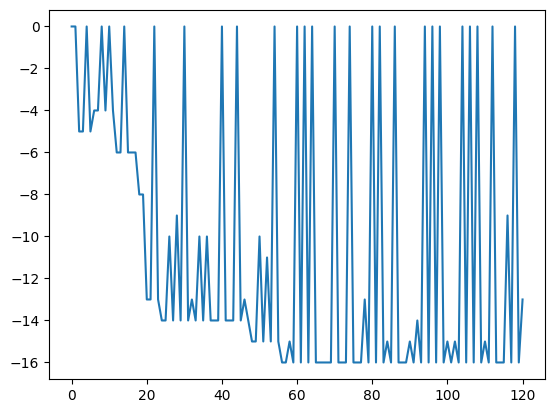



STARTING POINT = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1] 	 value = -2 
ITERAZIONE: 0 	 starting point: [1 0 0 0 0 0 0 0 0 1]
random_neighbour = [1 1 0 0 0 0 0 0 1 1] 	 valore = -6
random_neighbour = [0 1 0 0 1 0 0 0 1 1] 	 valore = -8
ITERAZIONE: 1 	 starting point: [0 1 0 0 1 0 0 0 1 1]
random_neighbour = [0 1 0 0 1 1 1 0 1 1] 	 valore = -14
random_neighbour = [1 1 0 0 1 1 1 0 1 0] 	 valore = -14
T = 1.5	 eval_x = -14, 	 eval_xp = -14
soglia = 1.0 	 numero casuale = 0.30370394868824957
ITERAZIONE: 2 	 starting point: [1 1 0 0 1 1 1 0 1 0]
random_neighbour = [1 1 0 0 0 1 1 0 0 0] 	 valore = -9
T = 0.75	 eval_x = -14, 	 eval_xp = -9
soglia = 0.0012726338013398079 	 numero casuale = 0.6407938951234687
random_neighbour = [0 1 0 1 1 1 1 0 1 0] 	 valore = 0
T = 0.75	 eval_x = -14, 	 eval_xp = 0
soglia = 7.81933232345508e-09 	 numero casuale = 0.5972787935370896
ITERAZIONE: 3 	 starting point: [1 1 0 0 1 1 1 0 1 0]
random_neighbour = [0 1 0 0 1 1 0 0 1 0] 	 valore = -10
T = 0.375	 eval_x = -14, 	 e

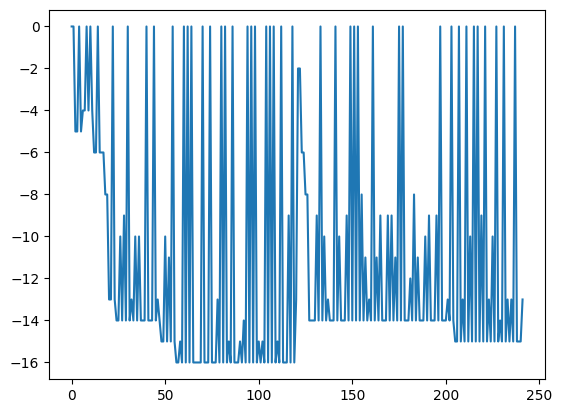

In [53]:
func = Knapsack_0_1()
change_T = False
T = 3
T_list = [1, 5 ,10, 20]
iter_list = 30 
change_k = False
k = 2
k_list = [1, 2, 5, 10]
alpha = 0.5
change_start = True
start = [0] * len(func._items)
start_list = [[0] * len(func._items), [random.randint(0, 1) for _ in range(len(func._items))] ]

if change_T == True:
    for T in T_list:
        print(f'\n\nTEMPERATURE = {T} ')
        x, eval_x = simulatedAnnealing(func, start, iter_list, T, k, alpha)
        print(f'SOLUZIONE FNALE = {x} \t VALORE = {eval_x}')
        func.trend()
elif change_k == True:
    for k in k_list:
        print(f'\n\nVICINATO = {k} ')
        x, eval_x = simulatedAnnealing(func, start, iter_list, T, k, alpha)
        print(f'SOLUZIONE FNALE = {x} \t VALORE = {eval_x}')
        func.trend()
elif change_start == True:
    for start in start_list:
        print(f'\n\nSTARTING POINT = {start} \t value = {func(start)} ')
        x, eval_x = simulatedAnnealing(func, start, iter_list, T, k, alpha)
        print(f'SOLUZIONE FNALE = {x} \t VALORE = {eval_x}')
        func.trend()

### Final questions:
Iterated local search, variable neighbor search, and simulated annealing are very similar optimization algorithms.
Considering what was seen in this lab and the previous one, answer these questions:
 - Is there a "more efficient" algorithm?

 VNS and ILS are particularry good to escape from local optima in easier solution, they might be more efficient in problems where local optima are numerous but not deeply separated. While SA is designed to handle more complex problems with rugged landscapes. Its ability to accept worse solutions probabilistically (based on a cooling schedule) allows it to escape deep and isolated local minima. This makes SA particularly suitable for challenging problems where simpler local search methods may struggle. 
 SA requires more iteration to converge due to its probabilistic nature and the gradual reduction of temperature, which means it can be slower compared to ILS and VNS. However, this slow convergence is what allows SA to thoroughly explore the solution space, making it effective for more difficult problems.
 And also its performances are really sensitive to the cooling schdule and the initial temperature setting, while ILS and VNS may not be as sensitive to parameter changes as SA. 
 
 - How do the different parameters affect the search, and do they affect the choice of one algorithm to respect the others?